In [1]:
using PyPlot;
using Images;
using TestImages;
using ColorTypes;
using Colors;

In [2]:
include("src/utils.jl");

# Problem 16.1 #

Given a wide matrix $A\in \mathbf{R}^{m\times n}$ with linearly independent rows, we know that $A^\dagger$ is a right inverse of $A$ since 

$$AA^\dagger = A \left(A^T(AA^T)^{-1}\right) = (AA^T)(AA^T)^{-1} = I$$

Suppose $AX=I$ then $||X|| \ge ||A^\dagger||$. To show this, let $x_1, x_2, \ldots x_m$ be the columns of $X$ and $b_j$ be the $j$th column of $A^\dagger$.

Since $X$ is the right inverse of $A$, we must have that $Ax_j = e_j$ for all $j$. The least norm solution of the system of equations is $x^\star_j = A^T(AA^T)^{-1}e_j = b_j$ by definition of $b_j$ being the $j$th column of $A^\dagger$.

This implies $||x_j||^2 \ge ||b_j||^2$ since it is the least norm solution. Solving each of these least norm problems independently leads to the conclusion $\sum_{j=1}^n ||x_j||^2 \ge \sum_{j=1}^n ||b_j||^2$. Specifically, $||X||^2_F \ge ||A^\dagger||^2_F$ which demonstrates that $A^\dagger$ is indeed the smallest right inverse in the Frobenius norm sense.

# Problem 16.2 #

The matrix least norm problem is given by 

\begin{align*}
    \text{minimize}_X\quad & ||X||^2\\
    \text{subject to}\quad & CX = D
\end{align*}

where the rows of $C$ are assumed to be independent. This can be rewritten as 

\begin{align*}
    \text{minimize}_X\quad & \sum_{i=1}^n ||x_i||^2\\
    \text{subject to}\quad Cx_1 &= d_1\\
    Cx_2 &= d_2\\
    &\vdots \\
    Cx_n &= d_n
\end{align*}

These can be solved as $n$ separate least norm problems each of which has solution
$x^\star_j = C^\dagger d_j$ so that $X^\star = C^\dagger D$

# Problem 16.3 #

Given a vector $y$ we solve the optimization problem 
\begin{align*}
\text{minimize}_{x}\quad & ||x-y||^2\\
\text{subject to }\quad & Cx = d
\end{align*}

by making the substitution $z = x - y$ so the optimization problem becomes the least norm problem 

\begin{align*}
\text{minimize}_z\quad & ||z||^2\\
\text{subject to }\quad & C(z+y) = d
\end{align*}

The solution to this problem is $z^\star = C^T(CC^T)^{-1}(d-Cy)$ so the optimal value of $x^\star$ is $C^T(CC^T)^{-1}(d-Cy) + y$

In [15]:
srand(3);
y = rand(-5:5,2,1);
C = rand(1,2);
d = rand();

In [16]:
z = nullspace(C);    # subspace spanning a line
xp = [d/C[1]; 0];   # a particular solution of Cx = d
xstar = C'*inv(C*C') *(d - C*y) + y

t = repmat(linspace(-10, 10, 1000),1,1);
plotvals =   t * z' .+ xp';

We can visually verify that the solution found is the closes to point $y$ that lies on the line $Cx = d$ by observing that is perpendicular.

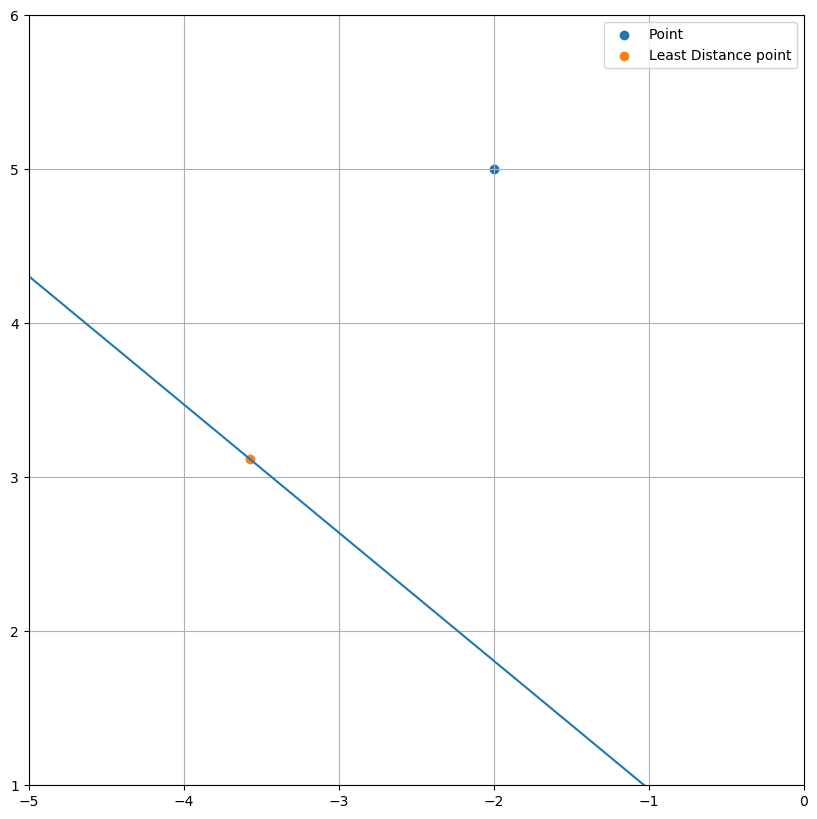

In [20]:
figure(figsize=(10,10))

scatter(y[1],y[2], label="Point");
plot(plotvals[:,1], plotvals[:,2]);
scatter(xstar[1], xstar[2], label= "Least Distance point")
grid(true);
legend()

xlim([-5,0]);
ylim([1,6]);

# Problem 16.4 #

Given $a\in \mathbf{R}^n$, we want to find the closest vector to $a$ with a given average $\beta \in \mathbf{R}$. The optimization problem is then 

\begin{align*}
\text{minimize}_{x}\quad & ||x-a||^2\\
\text{subject to }\quad & \mathbf{1}^Tx = n\beta
\end{align*}

By the previous problem, we know the solution is just 
\begin{align*}
x^\star &= \mathbf{1}(\mathbf{1}^T\mathbf{1})^{-1}(n\beta - \mathbf{1}^Ta) + a\\
&= \left(\beta - \frac{\mathbf{1}^Ta}{n}\right)\mathbf{1} + a
\end{align*}

In other words, the solution is vector $a$, mean centered, and then shifted by the new mean $\beta$ which intuitively makes sense.

# Problem 16.5 #

In [94]:
srand(17);
A = rand(20,10);
C = rand(5,10);
b = vec(rand(20));
d = vec(rand(5));

m, n = size(A);

Create the KKT matrix to solve the constrained least squares problem

In [93]:
kktMatrix, kktRHS = constrained_least_squares_kkt(A, b, C, d);

Solve the KKT equations and to get the optimal primal and dual variables

In [96]:
sol = kktMatrix \ kktRHS;
xstar = sol[1:n];
lambdaStar = sol[n+1:end];

Check the primal variables do indeed satisfy the equality contraint (very nearly)

In [101]:
residual = norm(C * xstar - d);
print("Constraint residual norm of optimal solution: $residual");

Constraint residual norm of optimal solution: 6.329245045284193e-16

Compute the least norm solution and check the equality constraints are satisfied. 

In [102]:
xln = C \ d;
residual = norm(C*xln - d);
print("Least norm constrain residual magnitude: $residual");


Least norm constrain residual magnitude: 5.723641179706052e-16

Check the value of the objective ||Ax - b|| for the optimal solution and the least norm solution. Indeed $||Ax^{ln} - b|| > ||Ax^{\star} - b||$

In [106]:
print("Objective of optimal constrained least squares solution: ",norm(A*xstar - b))

Objective of optimal constrained least squares solution: 1.2319030260238188

In [107]:
print("Objective of least norm solution: ", norm(A*xln - b))

Objective of least norm solution: 1.704249347549821

# Problem 16.7 #

The sector constraint can be expressed as $Sh = s$ where $S\in \mathbf{R}^{m\times n}$ has element $S_{ij}=1$ if asset $j$ is in sector $i$ and 0 otherwise, $h\in \mathbf{R}^n$ is the vector of trades we wish to makes and $s\in \mathbf{R}^m$ is the dollar valued sector exposure. To minimizie the transaction costs subject to the constraint that the total value of the portfolio is unchanged and the desired sector exposure is achieved we have

\begin{align*}
\text{minimize}_h\quad & ||\mathbf{diag}(\kappa_1,\ldots, \kappa_n)(h - h^{curr})||^2\\
\text{subject to}\quad& Sh = s\\
& \mathbf{1}^T h = \mathbf{1}^T h^{curr}
\end{align*}

The KKT equations for this constrained least squares problem is given by 

$$
\begin{bmatrix}
2\ \mathbf{diag}(\kappa_1^2,\ldots, \kappa_n^2) & S^T & \mathbf{1} \\
S & 0 & 0 \\
\mathbf{1}^T & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x\\
z
\end{bmatrix} = 
\begin{bmatrix}
2\ \mathbf{diag}(\kappa_1^2,\ldots, \kappa_n^2)h^{curr}\\
S\\
\mathbf{1}^T
\end{bmatrix}
$$


# Problem 16.8 #

Consider the linear dynamical system $x_{t+1} = Ax_t + Bu_t$. We can find an explicit formula by expanding the recursion 

\begin{align*}
x_2 &= Ax_1 + Bu_1\\
x_3 &= Ax_2 + Bu_2 = A^2x_1 + ABu_1 + Bu_2\\
    &\vdots\\
x_T &= A^{T-1}x_1 + A^{T-2}Bu_1 + \cdots + ABu_{T-2} + Bu_{T-1}
\end{align*}

To find the lowest energy inputs that drive the state to 0 over $T$ time steps, we can solve the optimization problem 

\begin{align*}
\text{minimize}_U\quad & ||u_1||^2 + ||u_2||^2 + \cdots + ||u_{T-1}||^2\\
\text{subject to}\quad & A^{T-1}x_1 +
\begin{bmatrix}
A^{T-2}B & \cdots & AB & B\\
\end{bmatrix}
\begin{bmatrix}
u_1\\
u_2\\
\vdots \\
u_{T-1}
\end{bmatrix} = 0\\
\end{align*}

This is easily observed to be a least norm problem which has solution $u^{\star}=C'(CC')^{-1}d$ where $C$ is the controllability matrix $[A^{T-2}B\ \cdots\ AB\ B]$ and $d = -A^{T-1}x_1$


In [6]:
srand(194);
n = 2;
m = 2;
T = 70;

A = rotate_mat2d(pi/4) * diagm([1, 0.8]) * rotate_mat2d(-pi/3);
# A = A_half * A_half';
B = eye(n, m);
x1 = vec(rand(-5.0:5.0, n));

In [7]:
Apow, control = state_propagation_matrix(A, B, T);
d = -Apow * x1;
u = control \ d;

print("Norm of equality constraint residual : ", norm(control * u - d))

Norm of equality constraint residual : 6.133173666733497e-19

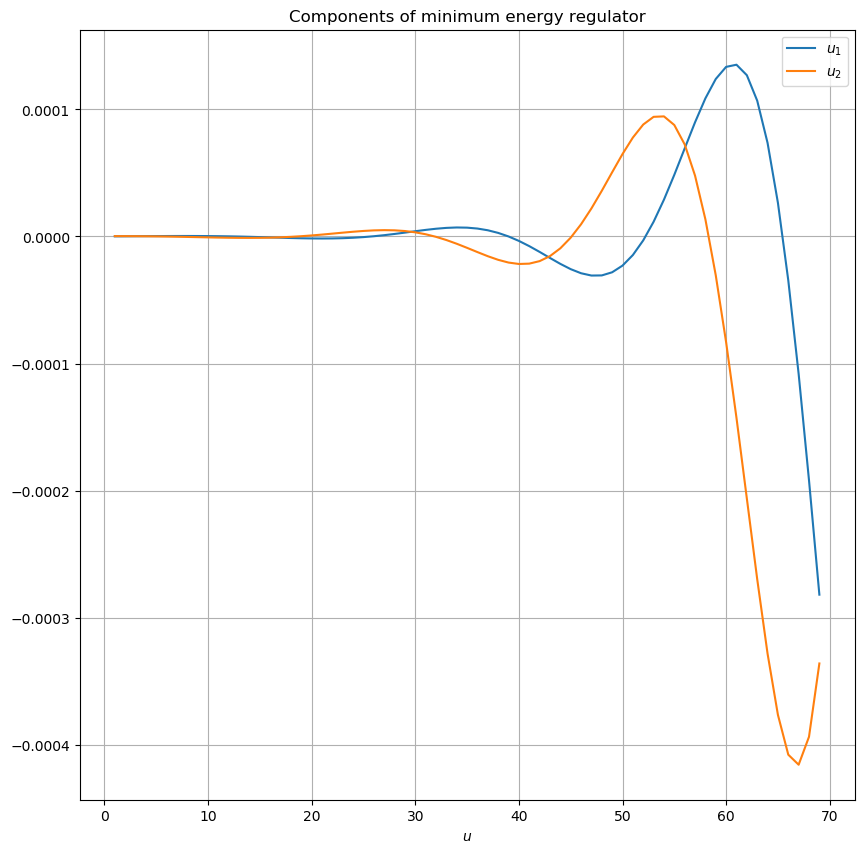

In [8]:
figure(figsize=(10,10))

plot(1:T-1, u[1:2:end], label = L"$u_1$");
plot(1:T-1, u[2:2:end], label = L"$u_2$");
grid(true);
legend();

title("Components of minimum energy regulator");
xlabel(L"$t$");
xlabel(L"$u$");

In [10]:
U = reshape(u, n, :);
X = propagate_linear_dyanmical_system(A, B, U, x1);

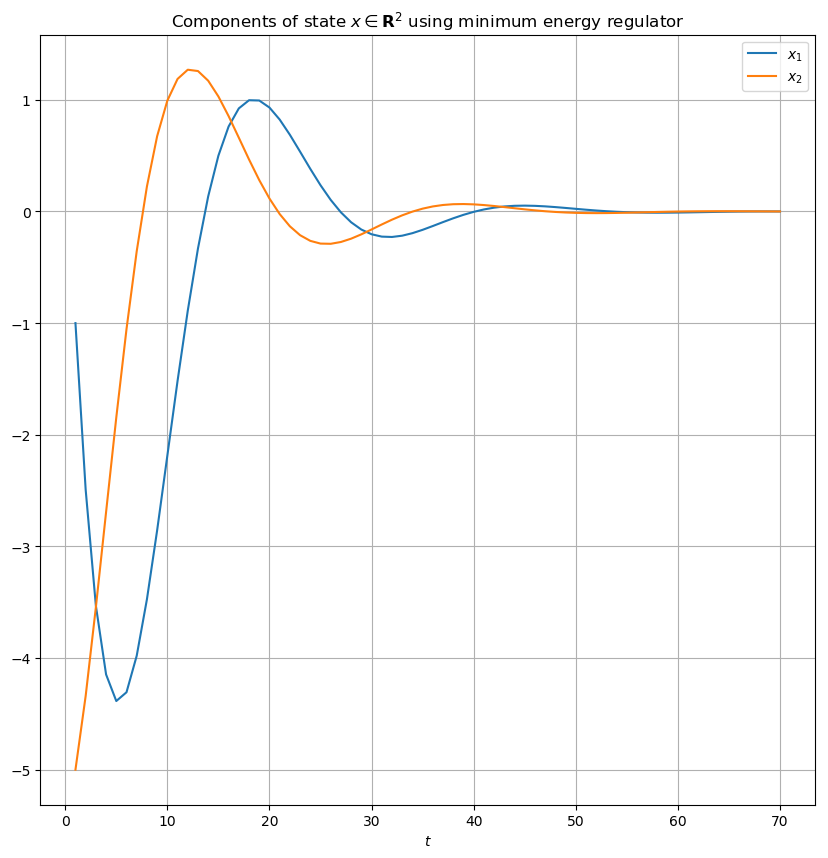

In [13]:
figure(figsize=(10,10))

plot(1:T, X[1,:], label = L"$x_1$");
plot(1:T, X[2,:], label = L"$x_2$");
grid(true);
legend();

title(L"Components of state $x\in \mathbf{R}^2$ using minimum energy regulator");
xlabel(L"$t$");

# Problem 16.9 #

We consider the problem of applying forces $f_1, \ldots,f_{10}$ to a block of unit mass in one second intervals. We wish to move the block from position 0 to 1 with the smoothest force program where the smoothness is defined as

$$f_1^2 + (f_2-f_1)^2 + (f_3-f_2)^2 + (f_{10}-f_9)^2 +f_{10}^2$$ 

The dynamics of the block are given by 
\begin{align*}
v_{k+1} &= f_k + v_k\\
x_{k+1} &= x_k + 0.5(v_{k+1} +v_k)
\end{align*}
which can be written as the linear dynamical system

$$
\begin{bmatrix}
v_{k+1}\\
x_{k+1}
\end{bmatrix}=
\begin{bmatrix}
1 & 0\\
1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
v_{k}\\
x_{k}
\end{bmatrix} +
\begin{bmatrix}
1\\
1/2
\end{bmatrix}f_k
$$

This can easily be seen from the below example by finding the area under the curve.

Our control problem is
\begin{align*}
\text{minimize}_{f} \quad & \left\lVert\begin{bmatrix}
1 & 0 & 0 & \cdots & 0 & 0\\
-1 & 1 & 0 & \cdots & 0 & 0\\
0 & -1 & 1 & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
0 & 0 & 0 & \cdots & 1 & 0\\
0 & 0 & 0 & \cdots & -1 & 1\\
0 & 0 & 0 & \cdots & 0 & -1\\
\end{bmatrix}
\begin{bmatrix}
f_1\\
f_2\\
f_3\\
\vdots\\
f_9\\
f_{10}
\end{bmatrix}\right\rVert^2\\
\text{subject to}\quad & v_1 = 0, v_{11}=0,x_1=0,x_{11}=1\\
&\begin{bmatrix}
v_{k+1}\\
x_{k+1}
\end{bmatrix}=
\begin{bmatrix}
1 & 0\\
1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
v_{k}\\
x_{k}
\end{bmatrix} +
\begin{bmatrix}
1\\
1/2
\end{bmatrix}f_k
\end{align*}

More succinctly, the constrained least squares problem is 
\begin{align*}
\text{minimize}_{f} \quad & \left\lVert Df \right\rVert^2\\
\text{subject to}\quad & \\
&\begin{bmatrix}
0\\
1
\end{bmatrix}=
\begin{bmatrix}
A^{9}B & A^{8}B & \cdots &AB & B\\
\end{bmatrix}
\begin{bmatrix}
f_1\\
f_2\\
\vdots\\
f_{10}
\end{bmatrix}
\end{align*}

In [20]:
A = [1.0 0; 1.0 1.0];
b = zeros(T + 1,1);
B = [1; 0.5];
d = [0; 1];
T = 10;
n = size(A,1);

D = eye(T+1, T);
D[2:T+1,1:T] += -eye(T,T);

In [30]:
Apow, control = state_propagation_matrix(A, reshape(B, n, :), T+1)

([1.0 0.0; 10.0 1.0], [1.0 1.0 … 1.0 1.0; 9.5 8.5 … 1.5 0.5])

In [28]:
Apower = eye(2);
C = zeros(2,T);
for i=0:T-1
    C[:,T-i] = Apower * B;
    Apower *= A;
end

In [33]:
kktMatrix = [2 * D' * D control'; control zeros(2,2)];
kktRhs = [2*D'*b; d];

In [36]:
xz_star = kktMatrix \ kktRhs;
f_star_smooth = xz_star[1:T];
f_star_ln = control \ d;


In [37]:
println("Least norm ||f||: ", norm(f_star_ln));
println("Smoothest ||f||: ", norm(f_star_smooth));
println();
println("Least norm ||Df||: ", norm(D * f_star_ln));
println("Smoothest ||Df||: ", norm(D * f_star_smooth));


Least norm ||f||: 0.1100963765126361
Smoothest ||f||: 0.11826247919781649

Least norm ||Df||: 0.08528028654224419
Smoothest ||Df||: 0.06827887419989187


In [38]:
N = 10001;
t = linspace(1, T+0.99, N);
f_smooth = zeros(size(t))
f_smooth[1] = f_star_smooth[1];

f_ln = zeros(size(t))
f_ln[1] = f_star_ln[1];

tprev = t[1]
for index in 1:N
    tcurr = t[index];
    if(index != 1)
        if (floor(tcurr) != floor(tprev))
            f_smooth[index] = f_star_smooth[Int(floor(tcurr))];
            f_ln[index] = f_star_ln[Int(floor(tcurr))];
        else
            f_smooth[index] = f_smooth[index - 1];
            f_ln[index] = f_ln[index - 1];
        end
        tprev = tcurr;      
    end
end
m = 1;


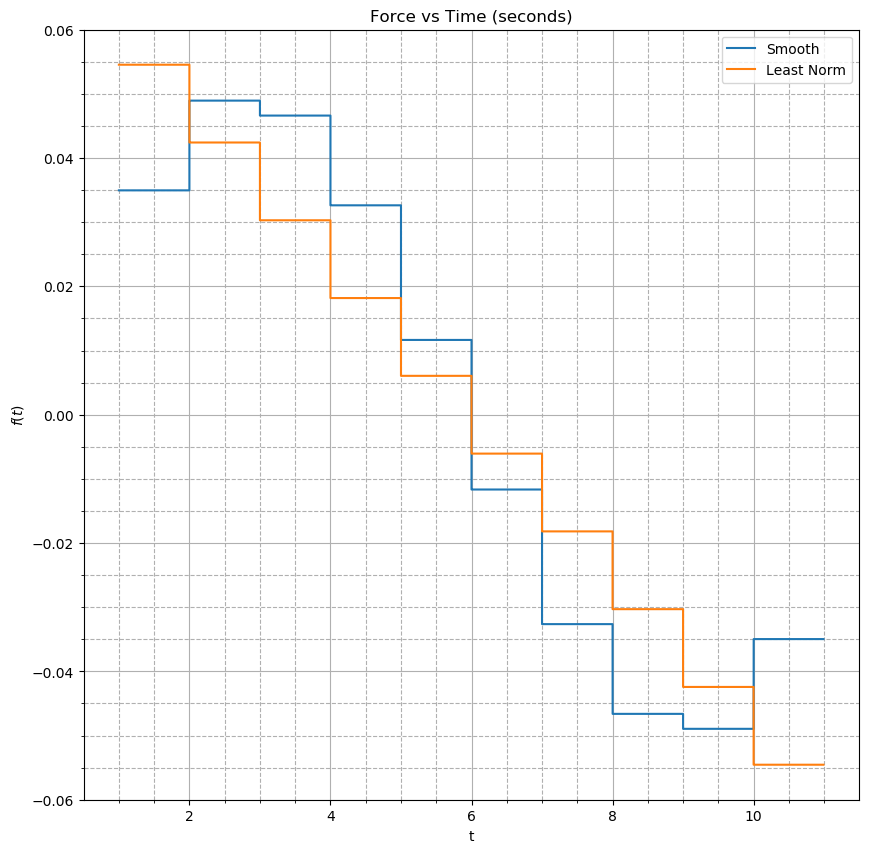

In [40]:
figure(figsize=(10,10))

step(t, f_smooth, label="Smooth");
step(t, f_ln, label="Least Norm");
PyPlot.minorticks_on()
grid(true, which="major");
grid(true, which="minor", linestyle="--");
legend();

title("Force vs Time (seconds)");
xlabel("t");
ylabel(L"$f(t)$");

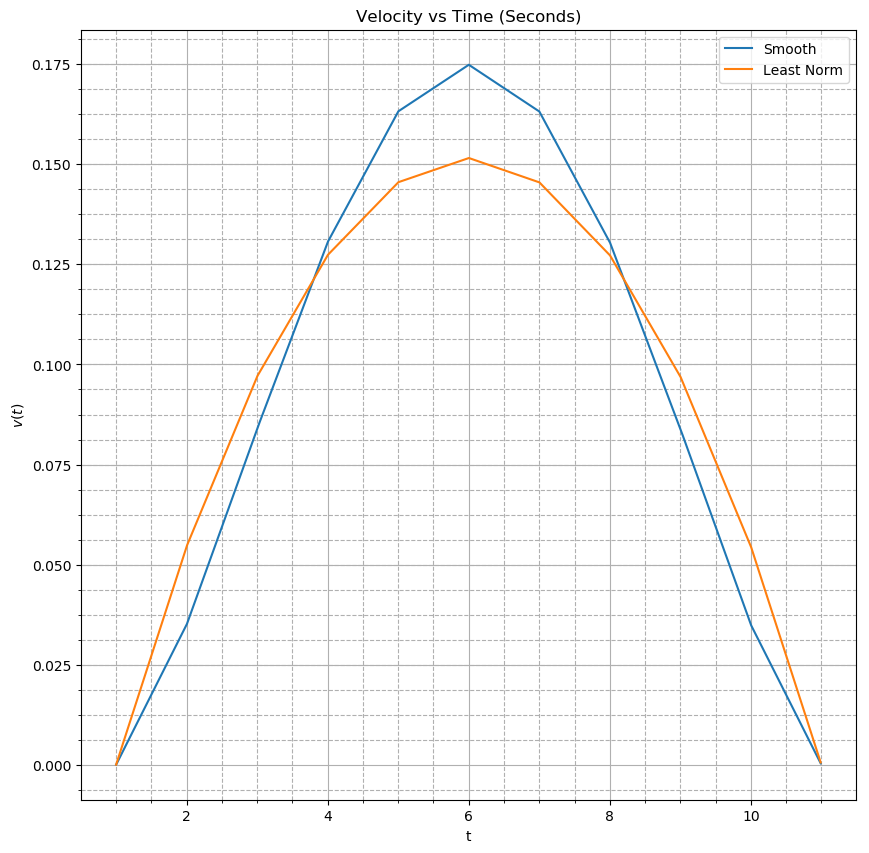

In [41]:
dt = t[2] - t[1];
v_smooth = cumsum(f_smooth * dt);
v_ln = cumsum(f_ln * dt);

figure(figsize=(10,10));

plot(t, v_smooth, label="Smooth");
plot(t, v_ln, label="Least Norm");
PyPlot.minorticks_on()
grid(true, which="major");
grid(true, which="minor", linestyle="--");
legend();

title("Velocity vs Time (Seconds)");
xlabel("t");
ylabel(L"$v(t)$");

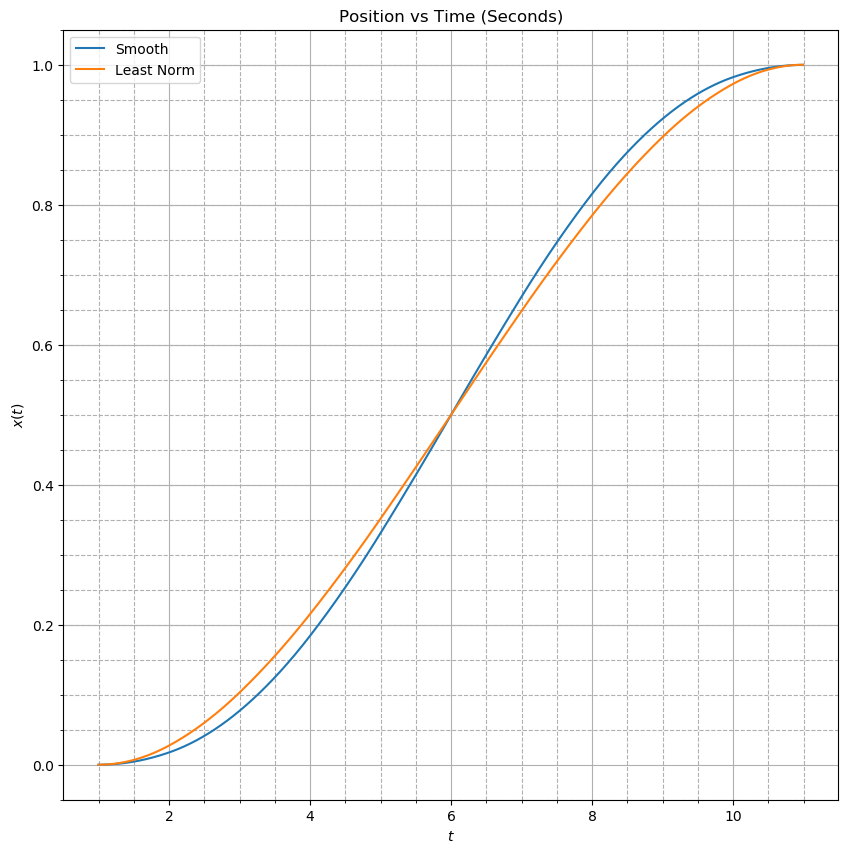

In [42]:
x_smooth = cumsum(v_smooth * dt);
x_ln = cumsum(v_ln * dt);

figure(figsize=(10,10));

plot(t, x_smooth, label="Smooth");
plot(t, x_ln, label="Least Norm");
PyPlot.minorticks_on()
grid(true, which="major");
grid(true, which="minor", linestyle="--");
legend();

title("Position vs Time (Seconds)");
xlabel(L"$t$");
ylabel(L"$x(t)$");

# Problem 16.10 #

We want to find a polynomial of the form $p(x) = c_0 +c_1x + c_2 x^2 + c_3x^3 + c_4x^4$ where 

$$p(0) = 0, \quad p'(0) = 0,\quad p(1) = 1, \quad p'(1) = 0$$

and the sum of the squares of the coefficients are minimized. This can be posed as the following least norm problem

\begin{align*}
\text{minimize}&\quad ||c||^2\\
\text{subject to} &\quad
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 2 & 3 & 4 \\
\end{bmatrix}
\begin{bmatrix}
c_0\\
c_1\\
c_2\\
c_3\\
c_4\\
\end{bmatrix} =
\begin{bmatrix}
0\\
0\\
1\\
0
\end{bmatrix}
\end{align*}

In [44]:
A = [1 0 0 0 0; 
     0 1 0 0 0; 
     1 1 1 1 1; 
     0 1 2 3 4];

b = [0; 0; 1; 0];
c = A \ b;
deg = 4;

In [48]:
srand(4937);

z = nullspace(A);  # subspace spanning a line
t = 10*rand(3,1) - 5;
c_subopt = c .+ z * t';

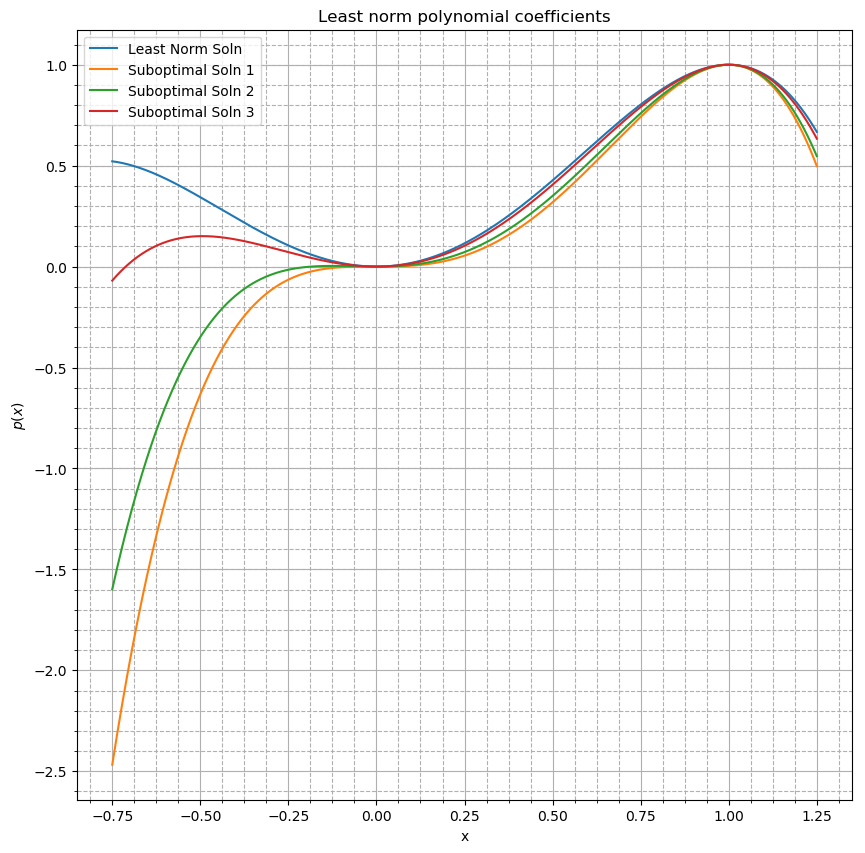

In [49]:
x = linspace(-0.75, 1.25,1000);
vandermonde_mat = vandermonde(x, deg);

figure(figsize=(10,10))

plot(x, vandermonde_mat * c, label="Least Norm Soln");
plot(x, vandermonde_mat * c_subopt[:,1], label="Suboptimal Soln 1");
plot(x, vandermonde_mat * c_subopt[:,2], label="Suboptimal Soln 2");
plot(x, vandermonde_mat * c_subopt[:,3], label="Suboptimal Soln 3");
PyPlot.minorticks_on()
grid(true, which="major");
grid(true, which="minor", linestyle="--");
legend();

title("Least norm polynomial coefficients");
xlabel("x");
ylabel(L"$p(x)$");

# Problem 16.11 #

The least norm steganography problem can be formulated as 
\begin{align*}
\text{minimize}&\quad ||z||^2\\
\text{subject to}&\quad D(x+z) = \alpha s\\
\end{align*}

The solution is given by $z^\star = D^\dagger(\alpha s - Dx) =D^T(DD^T)^{-1}(\alpha s - Dx)$

In [60]:
img = imread("img/steganography.png")
gray_img = 0.2989 * img[:,:,1] + 0.5870 * img[:,:,2] + 0.1140 * img[:,:,3];

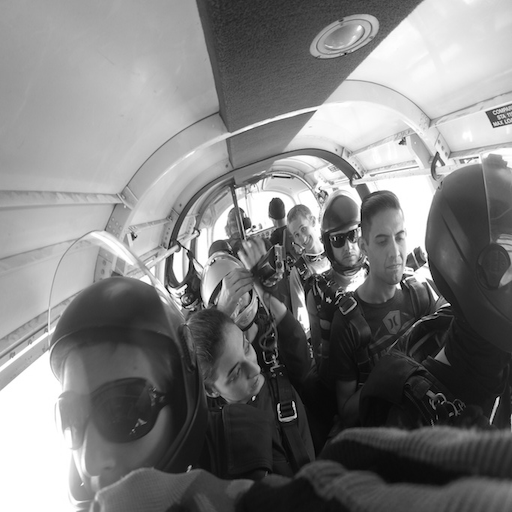

In [61]:
Gray.(gray_img);

In [62]:
function SecretMessage(msg, msg_bit_len)
    secret_message = zeros(msg_bit_len,1)
    x = convert(Vector{UInt8}, msg)
    for i in 1:length(x)
        j = 1
        for c in bits(x[i])
            index = 8 * (i-1) + j
            if (index > msg_bit_len)
                return 2 * secret_message - 1
            end
            secret_message[8 * (i-1) + j] = parse(Int,c)
            j += 1
        end   
    end
    
    return 2 * secret_message - 1
end

SecretMessage (generic function with 1 method)

In [63]:
k = 128;
n = length(gray_img)
D = rand(-5:5,k, n);
s = SecretMessage("Casey Haaland", k);
x = reshape(gray_img, n);

In [64]:
D_dagger = pinv(D);
b = D * x;

In [65]:
a1 = 0.001
a2 = 1
a3 = 100
a4 = 10000
z1 = D_dagger * (a1 * s - b);
z2 = D_dagger * (a2 * s - b);
z3 = D_dagger * (a3 * s - b);
z4 = D_dagger * (a4 * s - b);

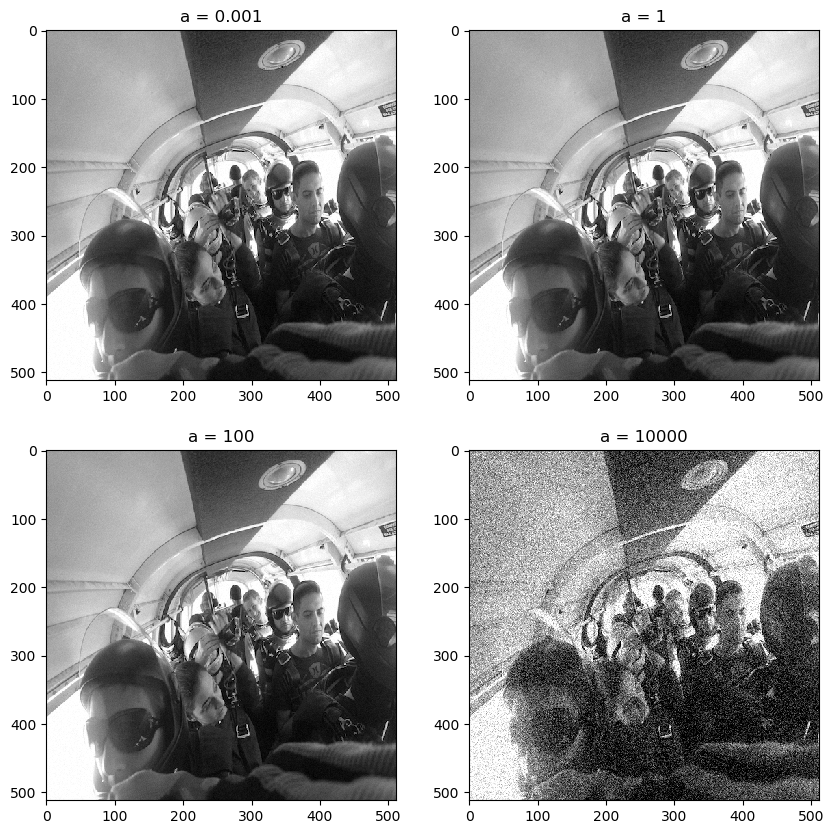

PyObject Text(0.5,1,'a = 10000')

In [66]:
transmitted_img1 = x + z1;
thresholded_img1 = max.(0, min.(transmitted_img1, 1));

transmitted_img2 = x + z2;
thresholded_img2 = max.(0, min.(transmitted_img2, 1));

transmitted_img3 = x + z3;
thresholded_img3 = max.(0, min.(transmitted_img3, 1));

transmitted_img4 = x + z4;
thresholded_img4 = max.(0, min.(transmitted_img4, 1));

figure(figsize=(10,10));

subplot(221);
imshow(reshape(thresholded_img1, size(gray_img)), cmap="gray");
title("a = $a1");

subplot(222)
imshow(reshape(thresholded_img2, size(gray_img)), cmap="gray");
title("a = $a2");

subplot(223)
imshow(reshape(thresholded_img3, size(gray_img)), cmap="gray");
title("a = $a3");

subplot(224)
imshow(reshape(thresholded_img4, size(gray_img)), cmap="gray");
title("a = $a4");


In [67]:
y1 = D * (x + z1);
decoded_message1 = sign.(y1);

y2 = D * (x + z2);
decoded_message2 = sign.(y2);

y3 = D * (x + z3);
decoded_message3 = sign.(y3);

y4 = D * (x + z4);
decoded_message4 = sign.(y4);

In [68]:
println("Number of decoding errors a = $a1 : ", sum(decoded_message1 - s));
println("Number of decoding errors a = $a2: ", sum(decoded_message2 - s))
println("Number of decoding errors a = $a3: ", sum(decoded_message3 - s))
println("Number of decoding errors a = $a4: ", sum(decoded_message4 - s))

Number of decoding errors a = 0.001 : 0.0
Number of decoding errors a = 1: 0.0
Number of decoding errors a = 100: 0.0
Number of decoding errors a = 10000: 0.0
